In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [130]:
flye_df = pd.read_csv("data/velvet_test.tsv", sep='\t')
megahit_df = pd.read_csv("data/megahit_test.tsv", sep='\t')
metaspades_df = pd.read_csv("data/metaspades_test.tsv", sep='\t')
abyss_df = pd.read_csv("data/abyss_test.tsv", sep='\t')
gsa_df = pd.read_csv("data/gsa.tsv", sep='\t')

merged1_df = pd.merge(left=flye_df, right=megahit_df, left_on='Assembly', right_on='Assembly')
merged2_df = pd.merge(left=metaspades_df, right=abyss_df, left_on='Assembly', right_on='Assembly')

In [131]:
merged1_df = (merged1_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'velvetg_on_data_22__Contigs_x': 'flye-result',
                         'velvetg_on_data_22__Contigs_y': 'megahit-result'}))
merged2_df = (merged2_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'velvetg_on_data_22__Contigs_x': 'metaspades-result',
                         'velvetg_on_data_22__Contigs_y': 'abyss-result'}))
gsa_df = (gsa_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'velvetg_on_data_22__Contigs': 'gsa-result'}))

merged_df = pd.merge(left=merged1_df, right=merged2_df, left_on='metric', right_on='metric')
df = pd.merge(left=merged_df, right=gsa_df, left_on='metric', right_on='metric')
df

,metric,flye-result,megahit-result,metaspades-result,abyss-result,gsa-result
0,# contigs (>= 0 bp),190,290,299,130,190
1,# contigs (>= 1000 bp),40,50,57,30,40
2,Total length (>= 0 bp),187266,287266,287555,299966,187266
3,Total length (>= 1000 bp),169152,269152,269555,211152,169152
4,# contigs,47,41,20,31,47
5,Largest contig,12932,22932,24444,24432,12932
6,Total length,173920,173920,193920,199920,173920
7,Reference length,197394,197394,257394,100094,197394
8,GC (%),33.64,33.64,39.64,39.64,33.64
9,Reference GC (%),33.43,23.43,43.43,29.43,33.43


In [132]:
df_list = df.values.tolist()

In [133]:
df_data = (df
            # remove last column
              .drop(['metric'], axis=1))

In [134]:
df_data_list = df_data.values.tolist()

In [135]:
df_data_list[35]

['5059', '6059', '7259', '6229', '5059']

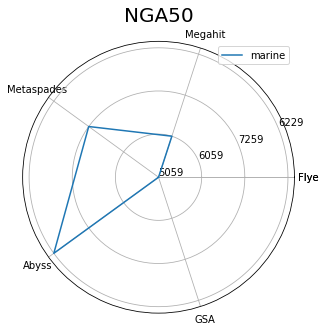

In [136]:
categories = ['Flye', 'Megahit', 'Metaspades', 'Abyss', 'GSA']
categories = [*categories, categories[0]]

marine = df_data_list[35]
marine = [*marine, marine[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine, label='marine')
plt.title('NGA50', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

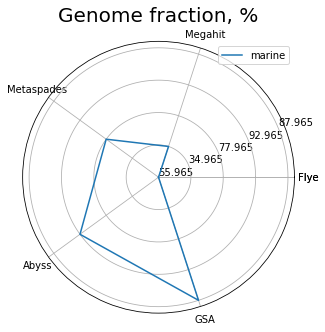

In [137]:
categories = ['Flye', 'Megahit', 'Metaspades', 'Abyss', 'GSA']
categories = [*categories, categories[0]]

marine_gf = df_data_list[27]
marine_gf = [*marine_gf, marine_gf[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine_gf))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine_gf, label='marine')
plt.title('Genome fraction, %', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [138]:
df_data_list[28]

['5.002', '2.5', '2.002', '1.002', '3.002']

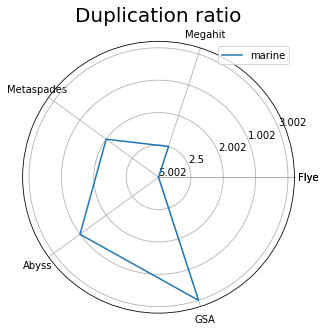

In [139]:
categories = ['Flye', 'Megahit', 'Metaspades', 'Abyss', 'GSA']
categories = [*categories, categories[0]]

marine = df_data_list[28]
marine = [*marine, marine[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine, label='marine')
plt.title('Duplication ratio', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [140]:
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

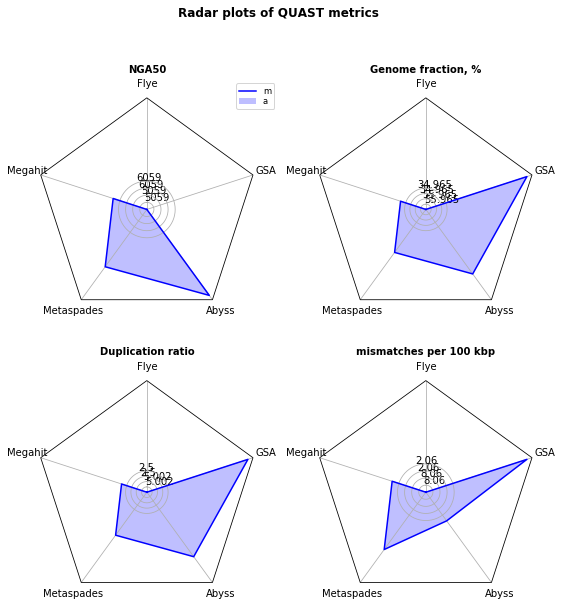

In [149]:
def example_data():
    data = [
        ['Flye', 'Megahit', 'Metaspades', 'Abyss', 'GSA'],
        ('NGA50', [
            df_data_list[35]]),
        ('Genome fraction, %', [
            df_data_list[27]]),
        ('Duplication ratio', [
            df_data_list[28]]),
        ('mismatches per 100 kbp', [
            df_data_list[30]])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('marine')
    legend = axs[0, 0].legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, 'Radar plots of QUAST metrics',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()